In [52]:
#Question 4 Task 1.1

import numpy as np
from scipy.stats import norm

rf = 0.05
S0 = 15
E = 18
T = 2
m = 4
sigma = 0.3

def european_put(rf, S0, E, T, sigma,m):
    "Calculate Black-Scholes price for a put"
    d1 = (np.log(S0/E) + (rf + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = E*np.exp(-rf*T)*norm.cdf(-d2, 0, 1) - S0*norm.cdf(-d1,0,1)
    return price


print("Put Price is: ", round(european_put( rf, S0, E, T, sigma,m),3))  

Put Price is:  3.32


In [84]:
#Question 4 Task 1.2

from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

# Initialise parameters

S0 = 15      # initial stock price
E = 18       # strike price
T = 2         # time to maturity in years
rf = 0.05      # annual risk-free rate
m = 4         # number of time steps
u = 1.1      # up-factor in binomial models
d = 1/u       # ensure recombining tree
opttype = 'P' # Option Type 'C' or 'P'

def binomial_tree_slow(E,T,S0,rf,m,u,d,opttype='C'):
    
    #precompute constants
    dt = T/m
    q = (np.exp(rf*dt) - d) / (u-d)
    disc = np.exp(-rf*dt)
    
    # initialise asset prices at maturity 
    S = np.zeros(m+1)
    S[0] = S0*d**N
    for j in range(1,m+1):
        S[j] = S[j-1]*u/d
    
    # initialise option values at maturity
    C = np.zeros(m+1)
    for j in range(0,m+1):
        C[j] = max(0, S[j]-E)
        
    # step backwards through tree
    for i in np.arange(m,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
    
    return C[0]

binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P')

0.5403134381306781

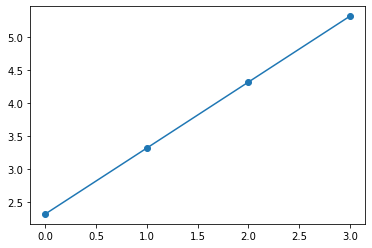

In [87]:
#Question 4 Task 1.3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({
      'x_axis': range(m),
      'y_axis': (round(european_put( rf, S0, E, T, sigma,m),3)-1)+range(m)
  })

# plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

Put Price is:  14.93
Binomial Tree is:  9.64


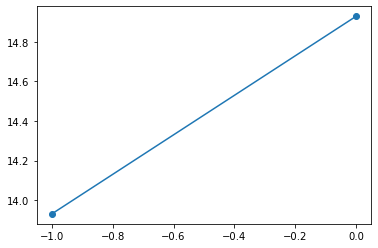

In [111]:
#Question 4 Task 2-rf

from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

# Initialise parameters

S0 = 100      # initial stock price
E = 100       # strike price
T = 5       # time to maturity in years
rf = 0.01     # annual risk-free rate
m = 0.001         # number of time steps
u = 1.1      # up-factor in binomial models
d = 1/u       # ensure recombining tree
opttype = 'P' # Option Type 'C' or 'P'
sigma = 0.2


def binomial_tree_slow(E,T,S0,rf,m,u,d,opttype='C'):
    
    #precompute constants
    dt = T/m
    q = (np.exp(rf*dt) - d) / (u-d)
    disc = np.exp(-rf*dt)
    
    # initialise asset prices at maturity 
    S = np.zeros(m+1)
    S[0] = S0*d**N
    for j in range(1,m+1):
        S[j] = S[j-1]*u/d
    
    # initialise option values at maturity
    C = np.zeros(m+1)
    for j in range(0,m+1):
        C[j] = max(0, S[j]-E)
        
    # step backwards through tree
    for i in np.arange(m,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
    
    return C[0]

binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P')


def european_put(rf, S0, E, T, sigma,m):
    "Calculate Black-Scholes price for a put"
    d1 = (np.log(S0/E) + (rf + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = E*np.exp(-rf*T)*norm.cdf(-d2, 0, 1) - S0*norm.cdf(-d1,0,1)
    return price


print("Put Price is: ", round(european_put( rf, S0, E, T, sigma,m),3)) 
print("Binomial Tree is: ", round(binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P'),3))


# data
df = pd.DataFrame({
      'x_axis': range(-1,1),
      'y_axis': (round(european_put( rf, S0, E, T, sigma,m),3))+range(-1,1)
  })

# plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

Put Price is:  0.006
Binomial Tree is:  0.0


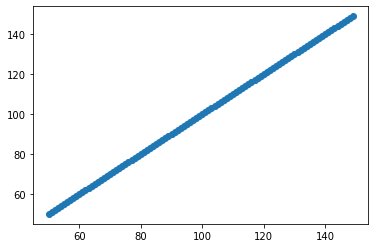

In [113]:
#Question 4 Task 2-S0

from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

# Initialise parameters

S0 = 50      # initial stock price
E = 100       # strike price
T = 5       # time to maturity in years
rf = 0.4     # annual risk-free rate
m = 1         # number of time steps
u = 1.1      # up-factor in binomial models
d = 1/u       # ensure recombining tree
opttype = 'P' # Option Type 'C' or 'P'
sigma = 0.2


def binomial_tree_slow(E,T,S0,rf,m,u,d,opttype='C'):
    
    #precompute constants
    dt = T/m
    q = (np.exp(rf*dt) - d) / (u-d)
    disc = np.exp(-rf*dt)
    
    # initialise asset prices at maturity 
    S = np.zeros(m+1)
    S[0] = S0*d**N
    for j in range(1,m+1):
        S[j] = S[j-1]*u/d
    
    # initialise option values at maturity
    C = np.zeros(m+1)
    for j in range(0,m+1):
        C[j] = max(0, S[j]-E)
        
    # step backwards through tree
    for i in np.arange(m,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
    
    return C[0]

binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P')


def european_put(rf, S0, E, T, sigma,m):
    "Calculate Black-Scholes price for a put"
    d1 = (np.log(S0/E) + (rf + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = E*np.exp(-rf*T)*norm.cdf(-d2, 0, 1) - S0*norm.cdf(-d1,0,1)
    return price


print("Put Price is: ", round(european_put( rf, S0, E, T, sigma,m),3)) 
print("Binomial Tree is: ", round(binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P'),3))


# data
df = pd.DataFrame({
      'x_axis': range(50,150),
      'y_axis': (round(european_put( rf, S0, E, T, sigma,m),3))+range(50,150)
  })

# plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

Put Price is:  0.0
Binomial Tree is:  18.941


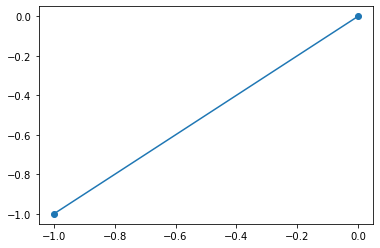

In [114]:
#Question 4 Task 2-sigma

from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

# Initialise parameters

S0 = 100      # initial stock price
E = 100       # strike price
T = 5       # time to maturity in years
rf = 0.04     # annual risk-free rate
m = 0.1         # number of time steps
u = 1.1      # up-factor in binomial models
d = 1/u       # ensure recombining tree
opttype = 'P' # Option Type 'C' or 'P'
sigma = 0.01


def binomial_tree_slow(E,T,S0,rf,m,u,d,opttype='C'):
    
    #precompute constants
    dt = T/m
    q = (np.exp(rf*dt) - d) / (u-d)
    disc = np.exp(-rf*dt)
    
    # initialise asset prices at maturity 
    S = np.zeros(m+1)
    S[0] = S0*d**N
    for j in range(1,m+1):
        S[j] = S[j-1]*u/d
    
    # initialise option values at maturity
    C = np.zeros(m+1)
    for j in range(0,m+1):
        C[j] = max(0, S[j]-E)
        
    # step backwards through tree
    for i in np.arange(m,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
    
    return C[0]

binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P')


def european_put(rf, S0, E, T, sigma,m):
    "Calculate Black-Scholes price for a put"
    d1 = (np.log(S0/E) + (rf + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = E*np.exp(-rf*T)*norm.cdf(-d2, 0, 1) - S0*norm.cdf(-d1,0,1)
    return price


print("Put Price is: ", round(european_put( rf, S0, E, T, sigma,m),3)) 
print("Binomial Tree is: ", round(binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P'),3))


# data
df = pd.DataFrame({
      'x_axis': range(-1,1),
      'y_axis': (round(european_put( rf, S0, E, T, sigma,m),3))+range(-1,1)
  })

# plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

Put Price is:  8.577
Binomial Tree is:  18.941


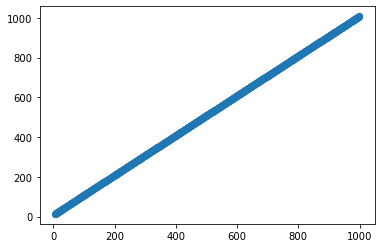

In [115]:
#Question 4 Task 2-M

from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

# Initialise parameters

S0 = 100      # initial stock price
E = 100       # strike price
T = 5       # time to maturity in years
rf = 0.04     # annual risk-free rate
m = 10         # number of time steps
u = 1.1      # up-factor in binomial models
d = 1/u       # ensure recombining tree
opttype = 'P' # Option Type 'C' or 'P'
sigma = 0.20


def binomial_tree_slow(E,T,S0,rf,m,u,d,opttype='C'):
    
    #precompute constants
    dt = T/m
    q = (np.exp(rf*dt) - d) / (u-d)
    disc = np.exp(-rf*dt)
    
    # initialise asset prices at maturity 
    S = np.zeros(m+1)
    S[0] = S0*d**N
    for j in range(1,m+1):
        S[j] = S[j-1]*u/d
    
    # initialise option values at maturity
    C = np.zeros(m+1)
    for j in range(0,m+1):
        C[j] = max(0, S[j]-E)
        
    # step backwards through tree
    for i in np.arange(m,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
    
    return C[0]

binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P')


def european_put(rf, S0, E, T, sigma,m):
    "Calculate Black-Scholes price for a put"
    d1 = (np.log(S0/E) + (rf + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = E*np.exp(-rf*T)*norm.cdf(-d2, 0, 1) - S0*norm.cdf(-d1,0,1)
    return price


print("Put Price is: ", round(european_put( rf, S0, E, T, sigma,m),3)) 
print("Binomial Tree is: ", round(binomial_tree_slow(E,T,S0,rf,N,u,d,opttype='P'),3))


# data
df = pd.DataFrame({
      'x_axis': range(5,1000),
      'y_axis': (round(european_put( rf, S0, E, T, sigma,m),3))+range(5,1000)
  })

# plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

In [3]:
#Question 4 Task 3.2

import numpy as np
from scipy.stats import norm

rf = 0.05
S0 = 15
E = 18
T = 2
sigma = 0.3

def european_put(rf, S0, E, T, sigma):
    "Calculate Black-Scholes price for a put"
    d1 = (np.log(S0/E) + (rf + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = S0*norm.cdf(-d2, 0, 1) - E*np.exp(-rf*T)*norm.cdf(-d1,0,1)
    return price


print("Put Price is: ", round(european_put( rf, S0, E, T, sigma),6))

Put Price is:  1.839396
